In [32]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn import linear_model

In [33]:
#https://www.stats.govt.nz/information-releases/annual-enterprise-survey-2020-financial-year-provisional

In [46]:
df = pd.read_csv("data/annual-enterprise-survey-2020-financial-year-provisional-csv.csv")

In [47]:
df.head()

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"733,258",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"660,630",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"54,342",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37080 entries, 0 to 37079
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         37080 non-null  int64 
 1   Industry_aggregation_NZSIOC  37080 non-null  object
 2   Industry_code_NZSIOC         37080 non-null  object
 3   Industry_name_NZSIOC         37080 non-null  object
 4   Units                        37080 non-null  object
 5   Variable_code                37080 non-null  object
 6   Variable_name                37080 non-null  object
 7   Variable_category            37080 non-null  object
 8   Value                        37080 non-null  object
 9   Industry_code_ANZSIC06       37080 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.8+ MB


In [49]:
#df.loc[34672]

In [50]:
#The first error that we come across is in the Value column, becasue they used commas, and 'S', 'C' characters to describe 0

In [51]:
df['Value'] = df['Value'].apply(lambda x : x.replace(',',''))

In [52]:
#df['Value'] = df['Value'].replace('C', 0)
#df['Value'] = df['Value'].replace('S', 0)

df = df[(df.Value != 'S') & (df.Value !='C')]
df.reset_index(drop = True, inplace = True) 

In [53]:
df['Value'] = df['Value'].apply(int)

In [44]:
#Now I am going to apply non-graphical techniques to show the parameters of the variables

In [45]:
df['Year'].describe()

count    35315.000000
mean      2016.513125
std          2.294660
min       2013.000000
25%       2015.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: Year, dtype: float64

In [51]:
df['Industry_aggregation_NZSIOC'].describe()

count       35315
unique          3
top       Level 4
freq        19269
Name: Industry_aggregation_NZSIOC, dtype: object

In [52]:
df['Industry_code_NZSIOC'].describe()

count     35315
unique      139
top       CC822
freq        288
Name: Industry_code_NZSIOC, dtype: object

In [53]:
df['Industry_name_NZSIOC'].describe()

count                                            35315
unique                                             119
top       Public Order, Safety and Regulatory Services
freq                                               652
Name: Industry_name_NZSIOC, dtype: object

In [54]:
df['Units'].describe()

count                  35315
unique                     3
top       Dollars (millions)
freq                   27642
Name: Units, dtype: object

In [55]:
df['Variable_code'].describe()

count     35315
unique       39
top         H01
freq       1112
Name: Variable_code, dtype: object

In [56]:
df['Variable_name'].describe()

count            35315
unique              41
top       Total income
freq              1112
Name: Variable_name, dtype: object

In [57]:
df['Value'].describe()

count    3.531500e+04
mean     3.121590e+04
std      2.445441e+05
min     -1.313000e+05
25%      5.400000e+01
50%      4.800000e+02
75%      3.706000e+03
max      9.680800e+06
Name: Value, dtype: float64

In [58]:
df['Industry_code_ANZSIC06'].describe()

count                             35315
unique                              121
top       ANZSIC06 groups C161 and C162
freq                                576
Name: Industry_code_ANZSIC06, dtype: object

In [59]:
#Now I'm using the profilereport to use the graphical techniques to show the variables

In [60]:
Report = ProfileReport(df)

In [61]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
df

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,733258,ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,660630,ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,54342,ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,18285,ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,654872,ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
35310,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
35311,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
35312,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
35313,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [55]:
#Now, as we can see the dataframe is practically clean, but we could be even more cleaner using the .pivot function to separate the columns

In [56]:
df.pivot_table(index = ['Year', 'Industry_name_NZSIOC', 'Industry_code_NZSIOC' ])

Value
Year Industry_name_NZSIOC                               Industry_code_NZSIOC              
2013 Accommodation                                      GH211                  4435.277778
     Accommodation and Food Services                    GH21                   5069.527778
     Administrative and Support Services                MN21                   4849.666667
     Adult, Community and Other Education               PP114                   363.043478
     Advertising, Market Research and Management Ser... MN113                 18348.787879
...                                                                                    ...
2020 Warehousing and Storage Services                   II133                 11841.551724
     Water, Sewerage, Drainage and Waste Services       DD12                  17924.148148
     Wholesale Trade                                    FF                    47938.527778
     Wood Product Manufacturing                         CC31                  11131.388889
                                                        CC311                 11131.388889

[1112 rows x 1 columns]

In [57]:
new_data = df.groupby(by=['Industry_name_NZSIOC', 'Year']).agg('sum')

In [58]:
new_data.reset_index(inplace = True)

In [59]:
def unir(lista1, lista2):
    return np.vstack((lista1, lista2)).ravel().astype(int)

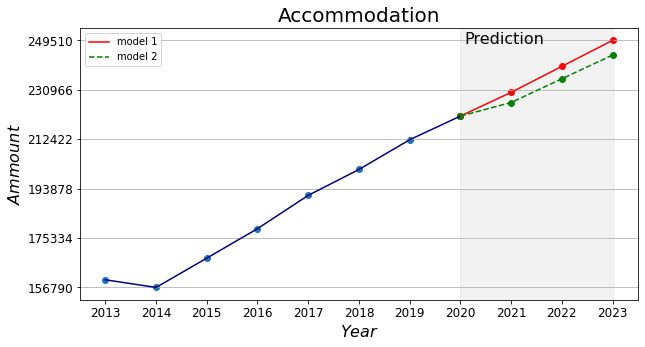

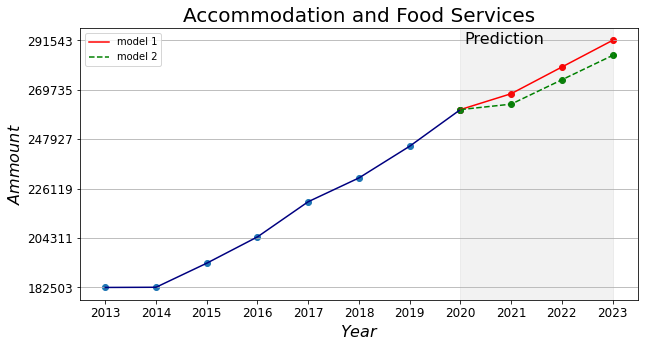

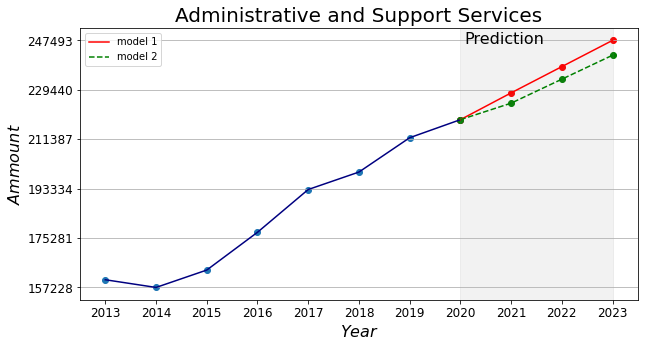

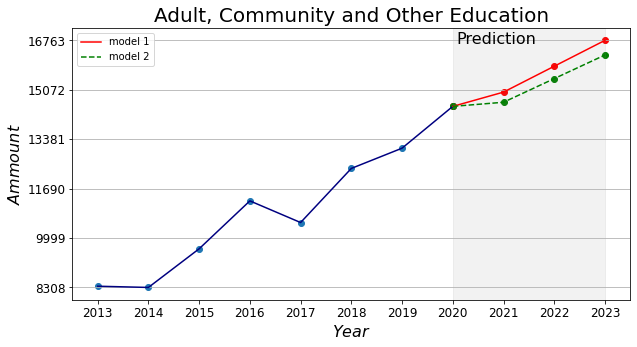

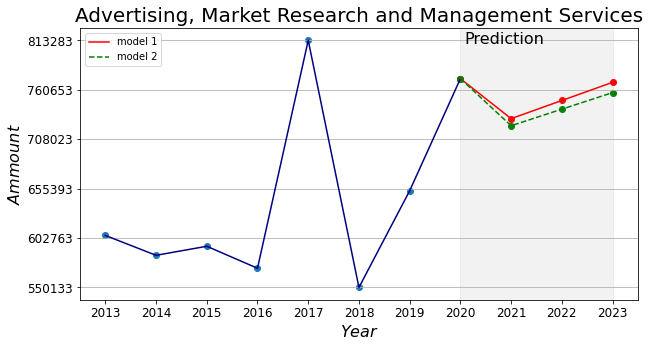

In [61]:
for industry in new_data.Industry_name_NZSIOC.unique()[:5]:
    
    
    

    aux = new_data[new_data.Industry_name_NZSIOC == industry].to_numpy()
    
    X = aux[:,[1]]
    Y = aux[:,[2]]
    
    model = linear_model.LinearRegression()
    model2 = linear_model.ElasticNet()
    
    model.fit(X,Y)
    model2.fit(X,Y)
    
    x_test = np.array( [ [x] for x in range(2021, 2024, 1) ])
    y_predict = model.predict(x_test)
    y_predict2 = model2.predict(x_test).reshape(-1, 1)

    
    xticks = unir(X,x_test)
    yticks = unir(Y,y_predict)
    
    x_test = unir(X[[-1]],  x_test)
    y_predict = unir(Y[[-1]],y_predict)
    y_predict2 = unir(Y[[-1]],y_predict2)
    
    yMax = yticks.max()
    yMin = yticks.min()
    step = (yMax - yMin) // (yticks.shape[0]//2)
        
    fig, ax = plt.subplots(figsize = (10,5))
    ax.set_title(industry, fontsize = 20)
    
    ### PLOT REAL DATA ###
    ax.plot(X, Y, c="navy")
    ax.scatter(X, Y)
    
    ### Plot Predict Data ###
    ### MODEL 1 ###
    ax.plot(x_test, y_predict, c="r", label = "model 1")
    ax.scatter(x_test, y_predict, c="r")
    ### MODEL 2 ###
    ax.plot(x_test, y_predict2, "--", c="green", label = "model 2")
    ax.scatter(x_test, y_predict2, c="green")
    
    ax.text(0.76, 0.96, 'Prediction', horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes, fontsize = 16)
    ax.axvspan(x_test.min(), x_test.max() , color='grey', alpha=0.1)
    #ax.axvspan(2020, 2023, color='white', alpha=0.1)
    
    ax.set_xlabel('$Year$', fontsize = 16)
    ax.set_ylabel('$Ammount$', fontsize = 16)
    ax.set_yticks(range(yMin, yMax + 1, step))
    ax.set_yticklabels(range(yMin, yMax + 1, step), fontsize=12)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=12)
    
    ax.grid(axis='y')
    ax.legend(loc="upper left")
    plt.show()